In [9]:
import pandas as pd

# Load the data
df = pd.read_csv('credit_data.csv')

# Drop any rows with missing values
df.dropna(inplace=True)

In [10]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 261584 entries, 0 to 279855
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       261584 non-null  int64  
 1   Gender                    261584 non-null  object 
 2   Income                    261584 non-null  int64  
 3   Credit Score              261584 non-null  int64  
 4   Credit History Length     261584 non-null  int64  
 5   Number of Existing Loans  261584 non-null  int64  
 6   Loan Amount               261584 non-null  int64  
 7   Loan Tenure               261584 non-null  int64  
 8   Existing Customer         261584 non-null  object 
 9   State                     261584 non-null  object 
 10  City                      261584 non-null  object 
 11  LTV Ratio                 261584 non-null  float64
 12  Employment Profile        261584 non-null  object 
 13  Profile Score             261584 non-null  int64 

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


In [11]:
from sklearn.preprocessing import LabelEncoder
categorical_variables = ["Gender", "Existing Customer", "State", "Employment Profile", "Occupation", "City"]
cont_var = list(df.drop(categorical_variables, axis=1).columns)
label_encoder = LabelEncoder()
# Fit and transform the categorical column
for var in categorical_variables:
    df[var] = label_encoder.fit_transform(df[var])
df = df.drop(columns=["Gender", "Credit History Length", "State", "City", "Employment Profile", "Occupation"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261584 entries, 0 to 279855
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       261584 non-null  int64  
 1   Income                    261584 non-null  int64  
 2   Credit Score              261584 non-null  int64  
 3   Number of Existing Loans  261584 non-null  int64  
 4   Loan Amount               261584 non-null  int64  
 5   Loan Tenure               261584 non-null  int64  
 6   Existing Customer         261584 non-null  int32  
 7   LTV Ratio                 261584 non-null  float64
 8   Profile Score             261584 non-null  int64  
dtypes: float64(1), int32(1), int64(7)
memory usage: 19.0 MB


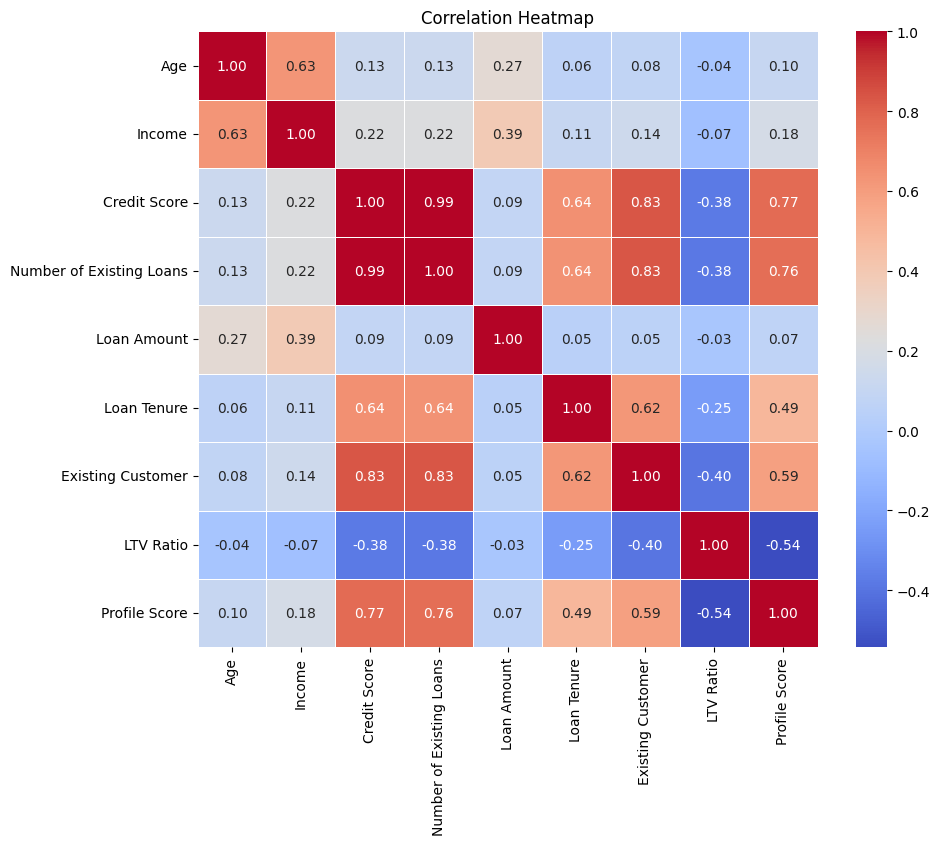

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# Separate features and target variable
X = df.drop('Profile Score', axis=1)
y = df['Profile Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
gb_regressor = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
import joblib

# Save the model as a .pkl file
joblib.dump(gb_regressor, 'gb_regressor.pkl')

['gb_regressor.pkl']